In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
#example below is in the docs.
from collections import defaultdict

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
df = pd.read_csv('/Users/jackohagan/datascience/wine/winemag-data-130k-v2.csv')

In [3]:
df.nunique()

Unnamed: 0               129971
country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [4]:
df['area'] = df['region_1'] + ', ' + df['province'] 

In [16]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,area,description_cleaned
0,0,Italy,Aromas include tropical fruit broom brimstone ...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"Etna, Sicily & Sardinia",aromas include tropical fruit broom brimstone ...
1,1,Portugal,This is ripe and fruity a wine that is smooth ...,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,NaN,this is ripe and fruity a wine that is smooth ...
2,2,US,Tart and snappy the flavors of lime flesh and ...,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"Willamette Valley, Oregon",tart and snappy the flavors of lime flesh and ...
3,3,US,Pineapple rind lemon pith and orange blossom s...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"Lake Michigan Shore, Michigan",pineapple rind lemon pith and orange blossom s...
4,4,US,Much like the regular bottling from 2012 this ...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"Willamette Valley, Oregon",much like the regular bottling from 2012 this ...


wordclouds


In [106]:
##filter stopwords
##add tasters, region and countries to stop wrods

from nltk.corpus import stopwords
stop = stopwords.words('english')

stop.append('wine')
stop.append('this')
stop.append('Wine')
stop.append('drink')
stop.append('flavor')
stop.append('fresh')

#remove punctuation and numbers
df["description"] = df["description"].str.replace('[^a-zA-Z ]','')

#stop.extend(df.designation.str.lower().str.split().explode().unique())


stop.extend(df.region_1.str.lower().str.split().explode().unique())


stop.extend(df.country.str.lower().str.split().explode().unique())

#stop.extend(df.winery.str.lower().str.split().explode().unique())


stop.extend(df.variety.str.lower().str.split().explode().unique())



/var/folders/_9/dygt4j8d1s1197cm8ymg58cm0000gn/T/ipykernel_4352/2908218943.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"] = df["description"].str.replace('[^a-zA-Z ]','')


In [107]:
##make unique overall
import re 


stop = list(set(stop))
print(len(stop))


df['description_cleaned'] = df['description'].str.lower()

2075


In [108]:


# Exclude stopwords 
df['description_cleaned'] = df['description_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))




In [109]:
## tokenize words (turn into list)


df['tokenized_sents']  = df.apply(lambda row: nltk.word_tokenize(row['description_cleaned']), axis=1)





In [110]:
##lemmatize the tokens - get the 'root' of each word

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

df['lemmatied_description'] = df['tokenized_sents'].apply(lemmatize_text)

In [111]:
##add extra columns, bin into 
##points / price - value
bins = [3, 7, 10, 20, 50, 100, 200, 20000]
df['value'] = df['points']/df['price']
df['price_bucket'] = pd.cut(df['price'],bins,labels=["extreme value", 'value','midrange','premium','luxury','super luxury', 'ridiculous'])
df['points_bucket'] = pd.cut(df['points'],5, labels=["low", "midlow", "mid",'midhigh','high'])
df['value_bucket'] = pd.qcut(df['value'],20)

In [112]:
df.groupby('price_bucket')['price'].agg(['min','max','count'])

,min,max,count
price_bucket,,,
extreme value,4.0,7.0,610
value,8.0,10.0,5670
midrange,11.0,20.0,40061
premium,21.0,50.0,54860
luxury,51.0,100.0,16408
super luxury,101.0,200.0,2684
ridiculous,202.0,3300.0,682


In [113]:
df['tidieddesc']  = [' '.join(map(str, l)) for l in df['lemmatied_description']]

# Exclude stopwords 
#df['tidieddesc'] = df['tidieddesc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))





In [114]:
df.to_csv('finalwinedatatidied.csv')
df.columns
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,winery,area,description_cleaned,tokenized_sents,lemmatied_description,value,price_bucket,points_bucket,value_bucket,tidieddesc
0,0,Italy,Aromas include tropical fruit broom brimstone ...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,Nicosia,"Etna, Sicily & Sardinia",aromas include tropical fruit broom brimstone ...,"[aromas, include, tropical, fruit, broom, brim...","[aroma, include, tropical, fruit, broom, brims...",NaN,NaN,midlow,NaN,aroma include tropical fruit broom brimstone d...
1,1,Portugal,This is ripe and fruity a wine that is smooth ...,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,Quinta dos Avidagos,NaN,ripe fruity smooth still structured firm tanni...,"[ripe, fruity, smooth, still, structured, firm...","[ripe, fruity, smooth, still, structured, firm...",5.800000,midrange,midlow,"(5.667, 6.071]",ripe fruity smooth still structured firm tanni...
2,2,US,Tart and snappy the flavors of lime flesh and ...,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Rainstorm,"Willamette Valley, Oregon",snappy flavors flesh rind dominate pineapple p...,"[snappy, flavors, flesh, rind, dominate, pinea...","[snappy, flavor, flesh, rind, dominate, pineap...",6.214286,midrange,midlow,"(6.071, 6.917]",snappy flavor flesh rind dominate pineapple po...
3,3,US,Pineapple rind lemon pith and orange blossom s...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,St. Julian,"Lake Michigan Shore, Michigan",pineapple rind lemon pith blossom start aromas...,"[pineapple, rind, lemon, pith, blossom, start,...","[pineapple, rind, lemon, pith, blossom, start,...",6.692308,midrange,midlow,"(6.071, 6.917]",pineapple rind lemon pith blossom start aroma ...
4,4,US,Much like the regular bottling from this come...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Sweet Cheeks,"Willamette Valley, Oregon",much like regular bottling comes across rather...,"[much, like, regular, bottling, comes, across,...","[much, like, regular, bottling, come, across, ...",1.338462,luxury,midlow,"(1.093, 1.415]",much like regular bottling come across rather ...


In [115]:
def wordcloud(df, selectioncol):
    
    
    df = df.groupby(selectioncol)['tidieddesc'].agg(list).to_dict()
    
    return df

In [156]:
df = df.groupby('price_bucket')['tidieddesc'].agg(list).to_dict()
    


In [116]:
countrydict =wordcloud(df=df, selectioncol='price_bucket')


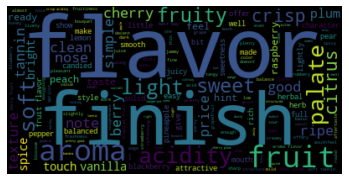

In [117]:
##create wordlcoud
wc = WordCloud()
wc.generate(' '.join(countrydict.get('extreme value')))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

/var/folders/_9/dygt4j8d1s1197cm8ymg58cm0000gn/T/ipykernel_4352/1262128342.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


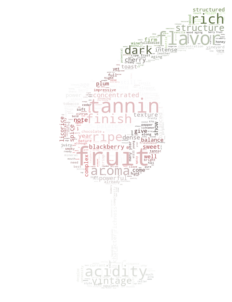

In [161]:
mask = np.array(Image.open('/Users/jackohagan/Downloads/red-wine-pouring-from-a-bottle-ralphbaleno-2.jpg'))
wc = WordCloud(mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])

# use ImageColorGenerator to generate the colors from the image
image_colors = ImageColorGenerator(mask)


wc.generate(' '.join(countrydict.get('ridiculous')))



# use the new colors to color the wordcloud
wc.recolor(color_func = image_colors)

fig = plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
fig.show()

In [139]:

from tqdm import tqdm #used for progress bar
import math

#list of prices
pricesgroup = df.price_bucket.unique()

###create a list of responses for each price using a list comprehension
corpus = [' '.join(df[(df.price_bucket==pricegroup)].tidieddesc.tolist()) for pricegroup in pricesgroup]


# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv=CountVectorizer( stop_words=stop, ngram_range=(1, 2))


In [170]:

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=pricesgroup

##filter to have at least 50 mentions
bow = bow.loc[:, (bow.sum() >= 200)]

/Users/jackohagan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [171]:
bow

,abound,absolutely,abundant,acacia,accent,accented,accessible,accompanied,acid,acid tannin,...,young,youre,youth,youthful,zest,zesty,zesty acidity,zin,zingy,zippy
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
midrange,119,34,105,150,904,474,211,98,871,25,...,1092,58,38,183,1016,1180,246,213,86,197
luxury,29,55,37,23,395,235,135,47,324,41,...,777,30,89,170,311,204,34,31,26,17
premium,133,110,172,181,1209,778,349,145,1375,132,...,1746,88,140,344,1347,1092,259,534,90,149
value,10,5,14,11,107,32,41,10,116,5,...,154,13,1,22,92,154,21,16,12,21
super luxury,4,14,4,1,45,36,18,9,23,2,...,126,9,16,25,43,11,2,0,2,2
ridiculous,0,7,0,0,9,8,4,1,9,1,...,56,0,3,10,6,6,1,0,0,1
extreme value,1,1,0,0,8,4,0,0,14,0,...,19,4,1,1,9,11,1,6,1,3


In [172]:
from tqdm import tqdm #used for progress bar
import math

#build an empty dataframe
t_bow_df=pd.DataFrame()

# By pricegroup, divide the number of times a word is said, 
# by the total number of times they've said all the words that they have said (frequency)
bow_transformed = bow.apply(lambda x: (x+1)/ (bow.loc[x.name].sum()+1), axis=1) 

for pricegroup in tqdm(pricesgroup):
    feat_s = bow[bow.index != pricegroup].sum()+1 #sum all the times each word was said excluding the pricegroup
    feat_s_all = np.sum(bow[bow.index != pricegroup].sum()) # all the total words that were said, excluding the pricegroup
    tot = feat_s / feat_s_all #find the frequency of words said among other pricegroups
    row = bow_transformed.loc[pricegroup] / tot #divide the pricegroup's array of frequency of words by all other pricegroups' frequency
    row = pd.DataFrame(row).T #create a df, and transform
    results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
    
    t_bow_df = pd.concat([t_bow_df, pd.DataFrame([results], index=[pricegroup])]) #append to df


100%|█████████████████████████████████████████████| 8/8 [00:00<00:00, 24.54it/s]


In [173]:
t_bow_df.to_csv('app_value_wordranking.csv')
t_bow_df.head()



,abound,absolutely,abundant,acacia,accent,accented,accessible,accompanied,acid,acid tannin,...,young,youre,youth,youthful,zest,zesty,zesty acidity,zin,zingy,zippy
NaN,13.029721,13.417491,12.864661,12.724403,9.857099,10.629330,11.676084,12.963269,9.827770,13.550553,...,9.288753,13.578704,13.069114,11.681797,9.780005,9.867372,12.101933,11.598381,13.475855,12.633015
midrange,0.633320,-1.261011,0.097193,0.679016,0.231147,-0.001450,-0.167949,0.096810,0.107710,-1.605192,...,-0.195111,-0.095103,-1.483978,-0.436666,0.371290,0.877550,0.833118,-0.256042,0.600712,1.231607
luxury,-0.721325,0.818964,-0.523653,-1.403429,-0.089485,-0.059945,0.239934,-0.021558,-0.452049,0.455151,...,0.400351,-0.042559,1.285870,0.660969,-0.572493,-1.144154,-1.485412,-2.150841,-0.392202,-1.939096
premium,-0.086219,0.129295,0.308955,0.173880,-0.074584,0.185014,-0.023025,0.020029,0.224241,1.031708,...,-0.143682,-0.164513,0.125627,-0.050804,0.072418,-0.314468,-0.029776,1.207943,-0.286962,-0.484801
value,-0.081865,-0.585843,0.213089,-0.267160,0.050384,-0.916958,0.528088,-0.150577,0.140277,-0.449638,...,0.001512,0.861110,-2.546314,-0.372464,-0.253500,0.609140,-0.004421,-0.905475,0.637550,0.551661


In [191]:
t_bow_df = pd.read_csv('app_value_wordranking.csv')
t_bow_df = t_bow_df.set_index('Unnamed: 0')

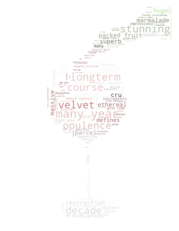

In [192]:
# create a pandas Series of the top 4000 most frequent words
text=t_bow_df.loc['ridiculous'].sort_values(ascending=False)

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=t_bow_df.loc['ridiculous'].sort_values(ascending=False).to_dict()

mask = np.array(Image.open('/Users/jackohagan/Downloads/red-wine-pouring-from-a-bottle-ralphbaleno-2.jpg'))
wc = WordCloud(mask=mask, background_color="white",
               max_words=150, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])

# use ImageColorGenerator to generate the colors from the image
image_colors = ImageColorGenerator(mask)


# generate the word cloud
wc.generate_from_frequencies(text2_dict)




# use the new colors to color the wordcloud
wc.recolor(color_func = image_colors)

#plot
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [76]:
text2_dict

{'best buy': 4.352610422618647,
 'aroma basic': 4.20437579898951,
 'prickle': 4.091867828292843,
 'valuepriced': 3.7725136770693064,
 'vinho': 3.6974742402660254,
 'buy': 3.6813038055933065,
 'vinho verde': 3.6734843011340077,
 'verde': 3.6605452454265097,
 'quaffing': 3.570879815899656,
 'price range': 3.42350604812566,
 'job done': 3.3130820584320095,
 'get job': 3.242692730540612,
 'inexpensive': 3.209704318586701,
 'buck': 3.128050164599489,
 'clean simple': 3.0804213016417346,
 'aroma simple': 3.0786168047949865,
 'powdered sugar': 3.050047652598216,
 'pithy citrus': 3.014858224135916,
 'forced': 2.9934641242318483,
 'go easy': 2.987311897250253,
 'aroma mild': 2.987311897250253,
 'good value': 2.9607803145011284,
 'fruity citrus': 2.9431324486817037,
 'wrong': 2.9271909048126816,
 'basic': 2.915847381672919,
 'clean light': 2.909185116758366,
 'simple finish': 2.909185116758366,
 'lightly sweet': 2.8821030152841445,
 'bland': 2.848840561152396,
 'generic berry': 2.843596775130789

In [ ]:


#build an empty dataframe
t_bow_df=pd.DataFrame()

# By candidate, divide the number of times a word is said, 
# by the total number of times they've said all the words that they have said (frequency)
df_transformed = df.apply(lambda x: (x+1)/ (df.loc[x.price_bucket].sum()+1), axis=1) 

for candidate in tqdm(speakers):
    feat_s = df[df.index != candidate].sum()+1 #sum all the times each word was said excluding the candidate
    feat_s_all = np.sum(bow[bow.index != candidate].sum()) # all the total words that were said, excluding the candidate
    tot = feat_s / feat_s_all #find the frequency of words said among other candidates
    row = bow_transformed.loc[candidate] / tot #divide the candidate's array of frequency of words by all other candidates' frequency
    row = pd.DataFrame(row).T #create a df, and transform
    results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
    
    t_bow_df = pd.concat([t_bow_df, pd.DataFrame([results], index=[candidate])]) #append to df
view raw wordcloud6.py hosted with ❤ by GitHub

Ratings by Country, Etc

In [222]:
df[['country','province','region_1','region_2','area','winery','title']]

cols = ['region_1','province','country']
df['combined'] = df[cols].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)

#df['fulladdress'] = df['region_1'] + ', ' + df['region_2'] + ', ' + df['province']  + ', ' + df['country']

In [196]:
def split_string(string1):
    words = string1.split()
    return " ".join(sorted(set(words), key=words.index))

In [212]:
df[['country','province','region_1','region_2','area']].drop_duplicates().to_csv('regiondata.csv')

In [223]:
df['combined'].drop_duplicates().to_csv('alldata.csv')